# Перцептрон, SVM и оценка моделей

Несколько предварительных моментов.

1. PCA - вектор, не матрица. Обладает той же размерностью, что и исходные данные. Может быть при желании преобразован в формат исходных данных.
2. Ограничения PCA.
3. Домашние задания!
4. Небольшой опрос в конце. Не гуглите! Никаких оценок, просто оценить понимание.
5. Начинаем более активно думать о проектах. Классификация или регрессия? Или просто изучение данных и визуалиация? Визуализация алгоритмов?

Классификация в простейшем случае сводится к построению разделяющей гиперплоскости

Пусть X - наши точки данных, Y - класс (+1, -1), w - вектор, задающий гиперплоскость.

![](images/1.png)
![](images/2.png)

Одна из моделей действующих подобным образом - перцептрон (1957)

![](images/3.png)

### Перцептрон - начало.

[![](http://img.youtube.com/vi/cNxadbrN_aI/0.jpg)](https://www.youtube.com/watch?v=cNxadbrN_aI)

In [1]:
import pandas as pd
import numpy as np

x1 = np.random.randint(0, 50, 2000)
x2 = np.random.randint(0, 50, 2000)
y = (x1 + x2) > 50

X = pd.DataFrame({'x1':x1, 'x2':x2})
X.head()

,x1,x2
0,27,6
1,7,6
2,6,20
3,20,40
4,17,16


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
clf = Perceptron()
clf.fit(X, y)
clf.score(X, y)

0.63349999999999995

Проблема XOR

![](http://cs-alb-pc3.massey.ac.nz/notes/59302/xor_plot.gif)

In [3]:
x1 = np.random.randint(0, 2, 2000)
x2 = np.random.randint(0, 2, 2000)
y = (x1 + x2) == 1
X = pd.DataFrame({'x1':x1, 'x2':x2})
clf = Perceptron()
clf.fit(X, y)
clf.score(X, y)

0.5

## Метод опорных векторов (Support Vector Machine)

![](images/4.png)

In [4]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
clf.score(X, y)

1.0

Что такое опорные векторы с точки зрения данных?

Зачем нужны другие точки, кроме опорных векторов?

Параметры SVM

$\gamma$ - "радиус границы", расстояние между гиперплоскостью и опорными векторами

$c$ - пенальти за ошибку

Зачем?

![](images/5.png)

Что делать если нелинейная граница? Использовать разные ядра (kernel) SVM!

[![](http://img.youtube.com/vi/3liCbRZPrZA/0.jpg)](https://www.youtube.com/watch?v=3liCbRZPrZA)

Очень быстрые вычисления благодаря матричным операциям, 
для предсказания нужны только опорные векторы.

[Математика хорошо описана у Andrew Ng](http://cs229.stanford.edu/notes/cs229-
notes3.pdf)

1. При работе с SVM - приведите все данные к одной шкале! (стандартизация/нормализация)

2. Некоторые библиотеки делают это сами, но обязательно проверять!

3. Будьте последовательны при обработке данных. Применяйте к тестовым данным те же трансформации, что и к тренировочным.

## Оценка моделей 

### [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

![](https://i.stack.imgur.com/0OxEo.png)

TP_rate = TP/(TP + FN)

FP_rate = FP/(FP + TN)

### [Receiver operating characteristic (ROC curve)](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)

![](http://www.chioka.in/wp-content/uploads/2014/04/sample-ROC-curve.png)

[Precision-recall curve](https://en.wikipedia.org/wiki/Precision_and_recall)

Recall = TP_rate = TP/(TP + FN)

Precision = TP/(TP + FP)

![](http://www.chioka.in/wp-content/uploads/2014/04/sample-PR-curve.png)

[Плюсы и минусы обоих методов хорошо описаны здесь](http://www.chioka.in/differences-between-roc-auc-and-pr-auc/)

## Время практики

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [6]:
df=pd.read_csv("../lesson_8/data/01_heights_weights_genders.csv").sample(300, replace=False)
print 'Total males {}'.format(np.sum(df.Gender=="Male"))
df.head()

Total males 146


,Gender,Height,Weight
6808,Female,63.251340,143.823095
9998,Female,69.034243,163.852461
6902,Female,66.555887,158.661411
7862,Female,67.423339,161.894008
1005,Male,72.548852,203.627584


In [8]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if mesh:
        if zfunc:
            p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
            p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            Z=zfunc(p0, p1)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=alpha, axes=ax)
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    ax.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1, prob=True):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha) 
    if prob:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [9]:
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask[:10]

array([False, False,  True, False,  True, False, False,  True,  True, False], dtype=bool)

/home/modintsov/.virtualenvs/ds2017/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'C': 0.01} 0.927777777778 [mean: 0.91667, std: 0.04324, params: {'C': 0.001}, mean: 0.92778, std: 0.03737, params: {'C': 0.01}, mean: 0.92778, std: 0.03737, params: {'C': 0.1}, mean: 0.92778, std: 0.03737, params: {'C': 1}, mean: 0.92778, std: 0.03737, params: {'C': 10}, mean: 0.92778, std: 0.03737, params: {'C': 100}, mean: 0.92778, std: 0.03737, params: {'C': 1000}, mean: 0.92778, std: 0.03737, params: {'C': 10000}]
############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.91
[[59  4]
 [ 7 50]]
########################################################


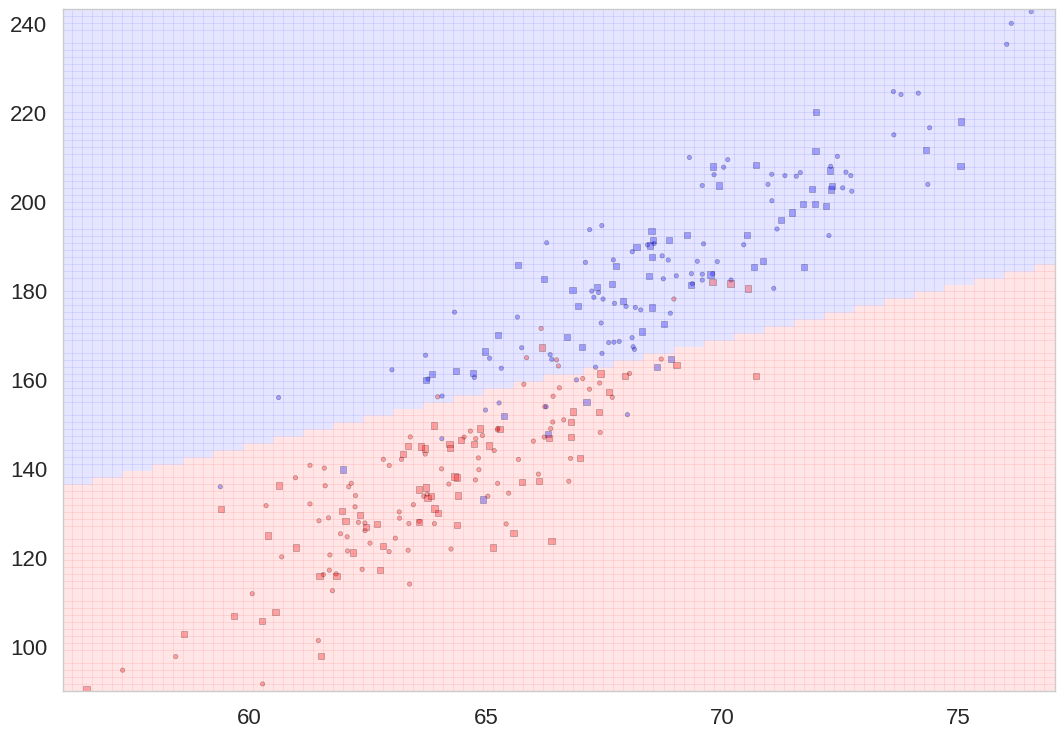

In [10]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression()
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
clflog, Xtrain, ytrain, Xtest, ytest=do_classify(clflog, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clflog);

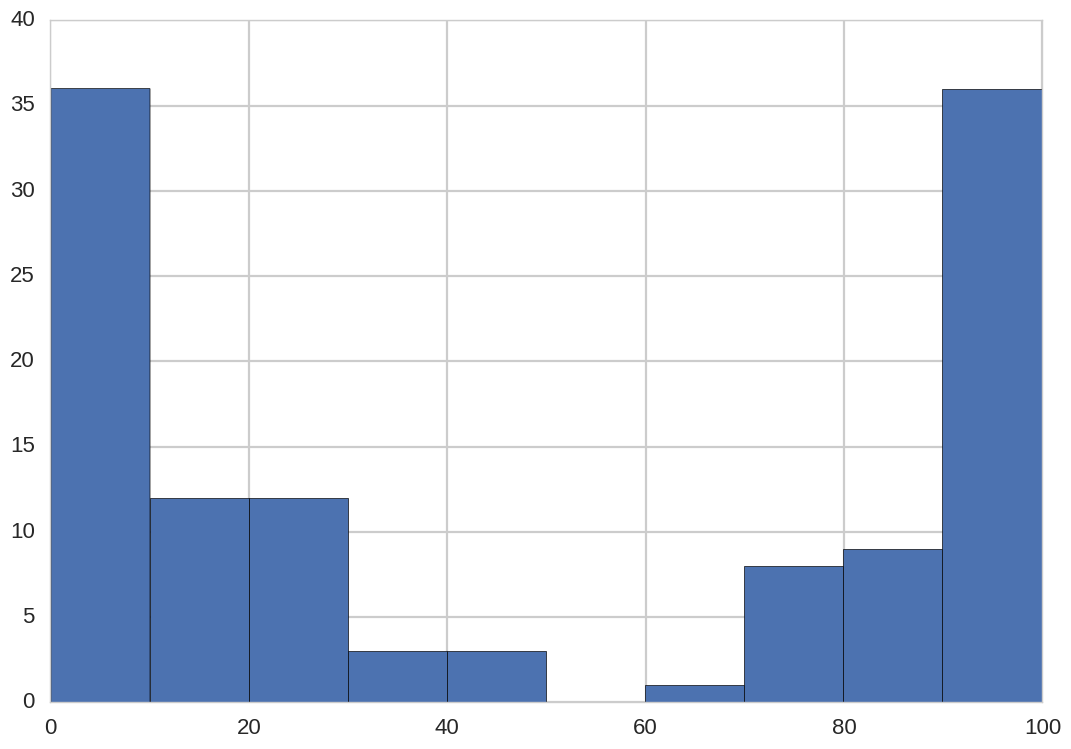

In [11]:
plt.hist(clflog.predict_proba(Xtest)[:,1]*100);

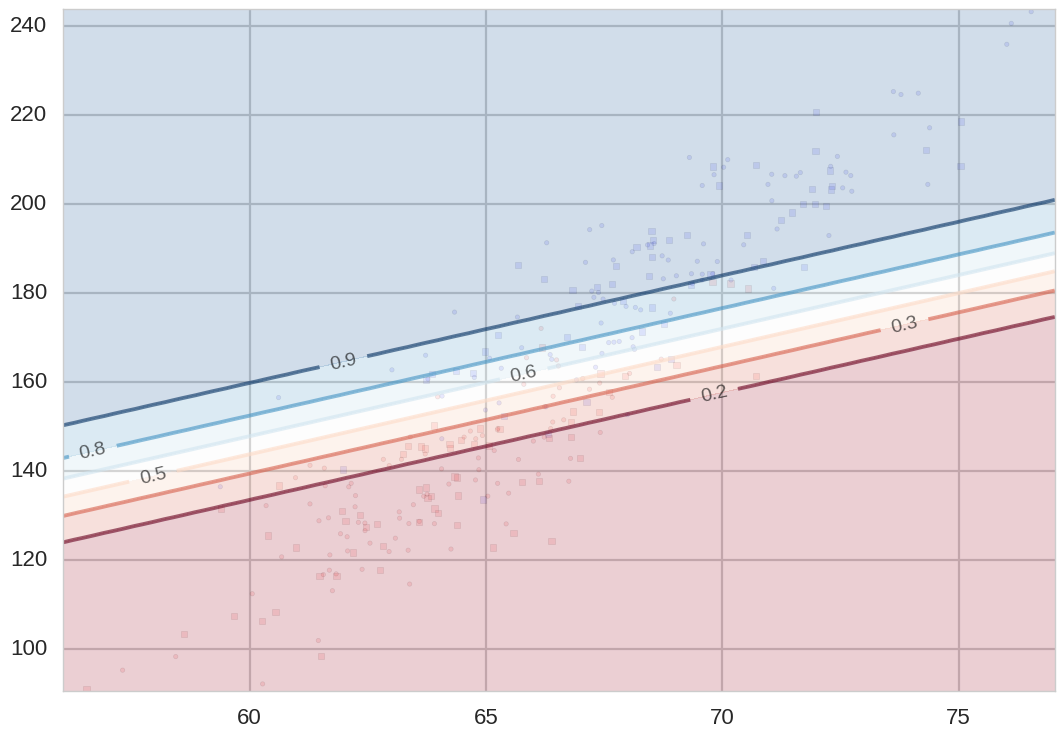

In [12]:
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clflog, mesh=False, alpha=0.001);
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clflog);

In [13]:
clflog.score(Xtest, ytest)

0.90833333333333333

/home/modintsov/.virtualenvs/ds2017/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'C': 10} 0.922222222222 [mean: 0.89444, std: 0.04176, params: {'C': 0.001}, mean: 0.91111, std: 0.04501, params: {'C': 0.01}, mean: 0.91111, std: 0.04085, params: {'C': 0.1}, mean: 0.91667, std: 0.04285, params: {'C': 1}, mean: 0.92222, std: 0.04758, params: {'C': 10}, mean: 0.92222, std: 0.04758, params: {'C': 100}, mean: 0.91667, std: 0.03590, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.91
[[59  4]
 [ 7 50]]
########################################################


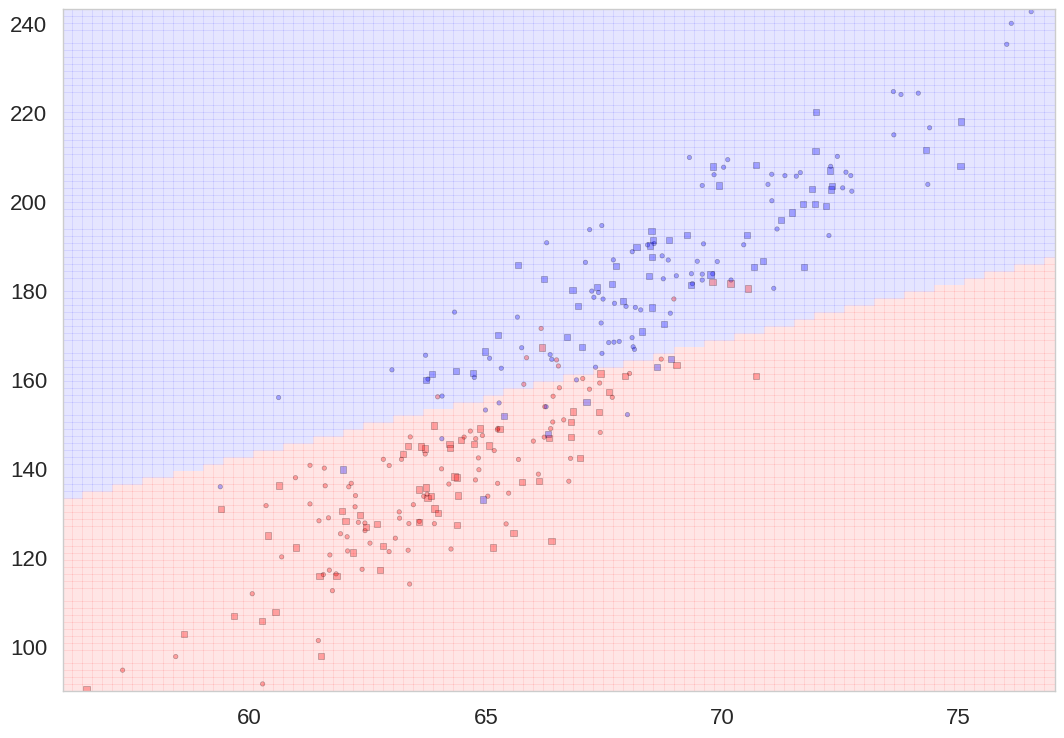

In [14]:
from sklearn.svm import SVC
clfsvm = SVC(kernel="linear")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clfsvm, Xtrain, ytrain, Xtest, ytest=do_classify(clfsvm, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clfsvm);

In [15]:
clfsvm.decision_function(Xtest)

array([-1.23912941, -0.42682735, -0.06593582,  4.09557593, -3.45360538,
       -1.53627406, -2.52597471,  1.7619747 ,  3.09213819, -3.69778243,
        3.22966088, -3.51445909,  4.15869616, -6.09271008, -1.18846323,
        2.26867883,  4.02009909,  4.28622644,  2.5637379 , -0.16556891,
        1.40780032,  6.47771358, -1.50633492, -3.0844447 ,  4.17772051,
       -3.62236108,  4.21308009, -1.0024964 , -3.86667216,  5.91048052,
        3.12082421,  3.88365132,  1.71466261, -1.24515765, -2.77804234,
       -1.56747391,  4.31782298,  1.07806065,  3.05919955,  6.14050269,
       -1.26388297, -0.76121897,  4.78917669, -3.3240213 , -1.47110872,
        1.55790096, -1.70746706, -4.42600351,  2.24754464,  3.7183953 ,
       -1.28246477,  3.71315909,  6.13986091, -3.16968753, -0.48118848,
        2.43545287,  2.58953055, -3.25311322, -1.80887608, -1.2755187 ,
       -5.64725178, -5.85458652,  5.28862074, -3.5643415 , -1.63264993,
       -3.01137238, -5.72941334,  5.18450199,  1.87340571,  2.37

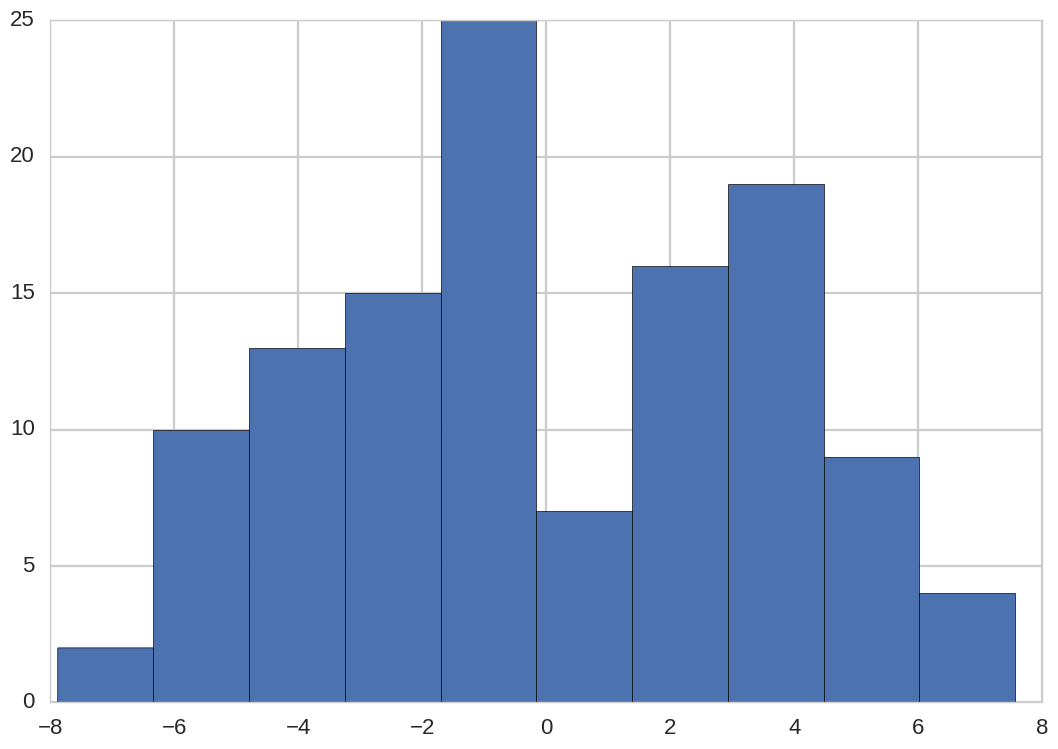

In [16]:
plt.hist(clfsvm.decision_function(Xtest));

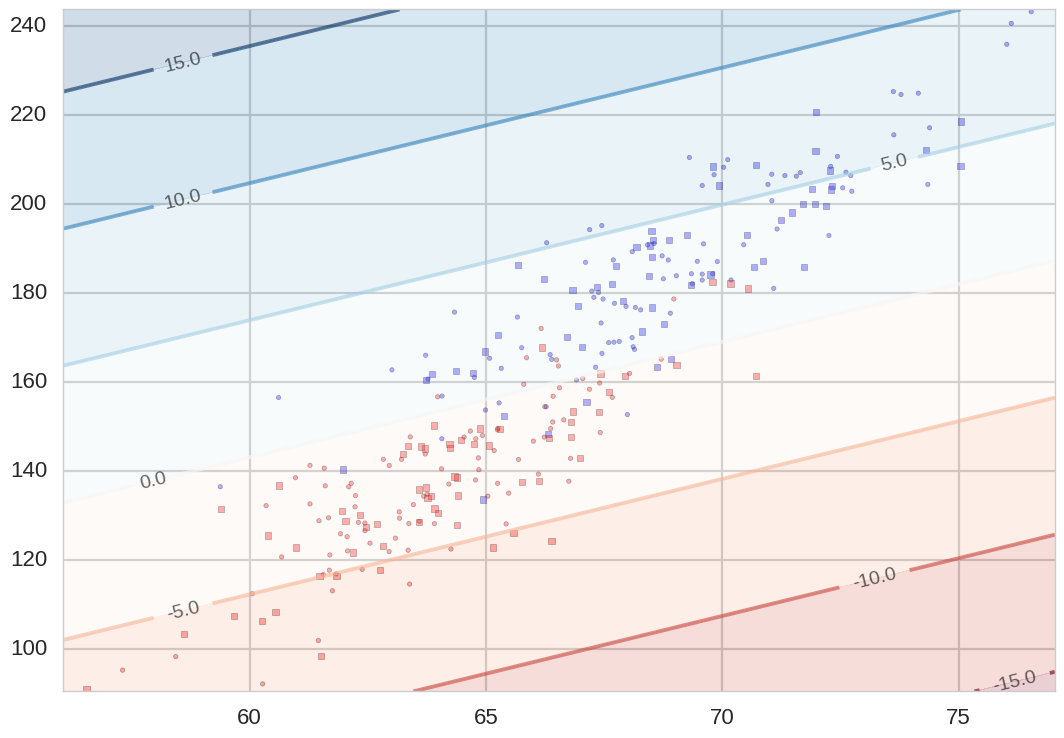

In [19]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clfsvm, mesh=False);
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clfsvm, prob=False);

In [20]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    return ax.contour(X, Y, P, colors='k',
                      levels=[-1, 0, 1], alpha=0.5,
                      linestyles=['--', '-', '--'])

(125, 225)

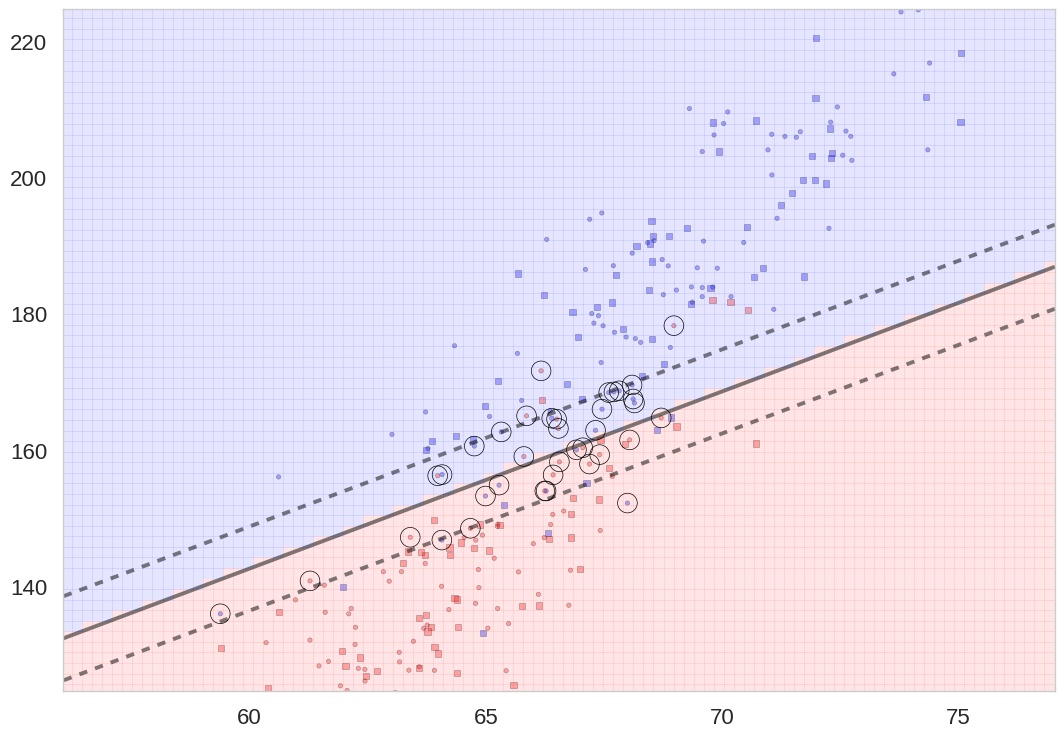

In [22]:
import warnings
warnings.filterwarnings('ignore')

ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, clfsvm);
plot_svc_decision_function(clfsvm, ax)
ax.scatter(clfsvm.support_vectors_[:, 0], clfsvm.support_vectors_[:, 1],s=200, facecolors='none')
plt.ylim([125,225])

In [23]:
from sklearn.metrics import classification_report
print classification_report(ytest, clflog.predict(Xtest))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91        63
          1       0.93      0.88      0.90        57

avg / total       0.91      0.91      0.91       120



In [31]:
def t_repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

# FN almost gone
print confusion_matrix(ytest, t_repredict(clflog, 0.1, Xtest))

# FP gone entirely
print confusion_matrix(ytest, t_repredict(clflog, 0.9, Xtest))

[[35 28]
 [ 1 56]]
[[63  0]
 [21 36]]


In [41]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, label=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in xrange(0, fpr.shape[0],label):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

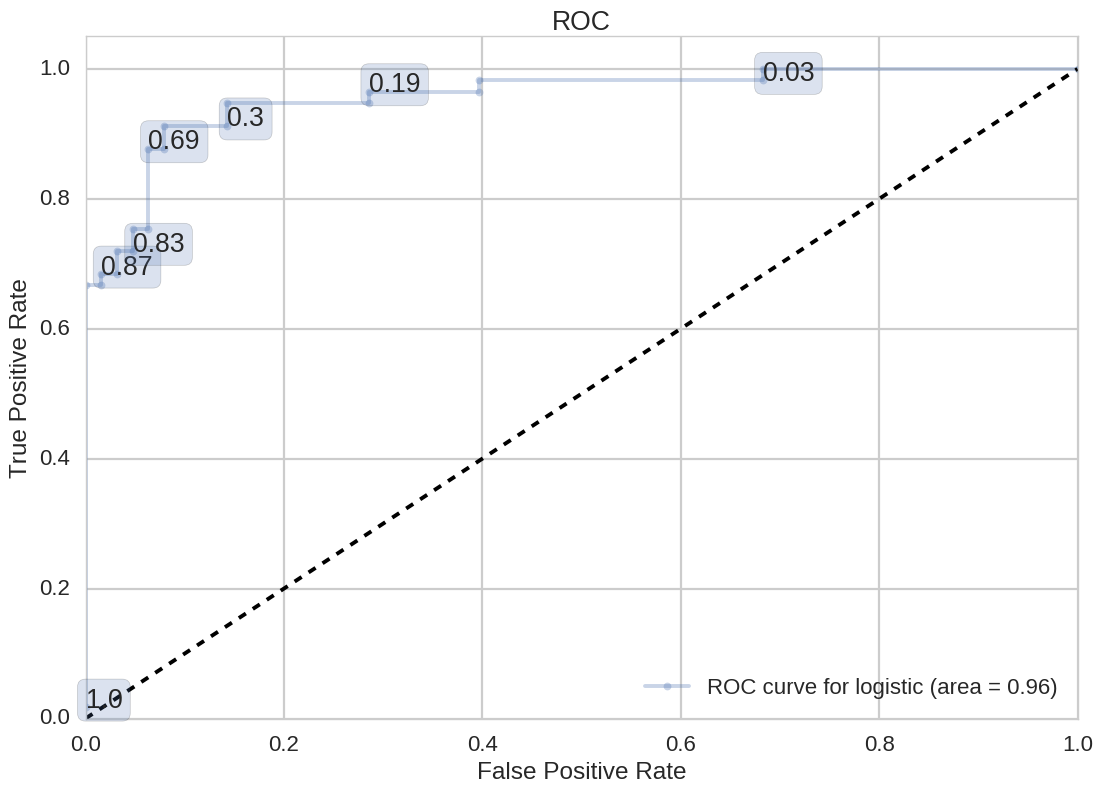

In [43]:
ax=make_roc("logistic", clflog, ytest, Xtest, label=3)

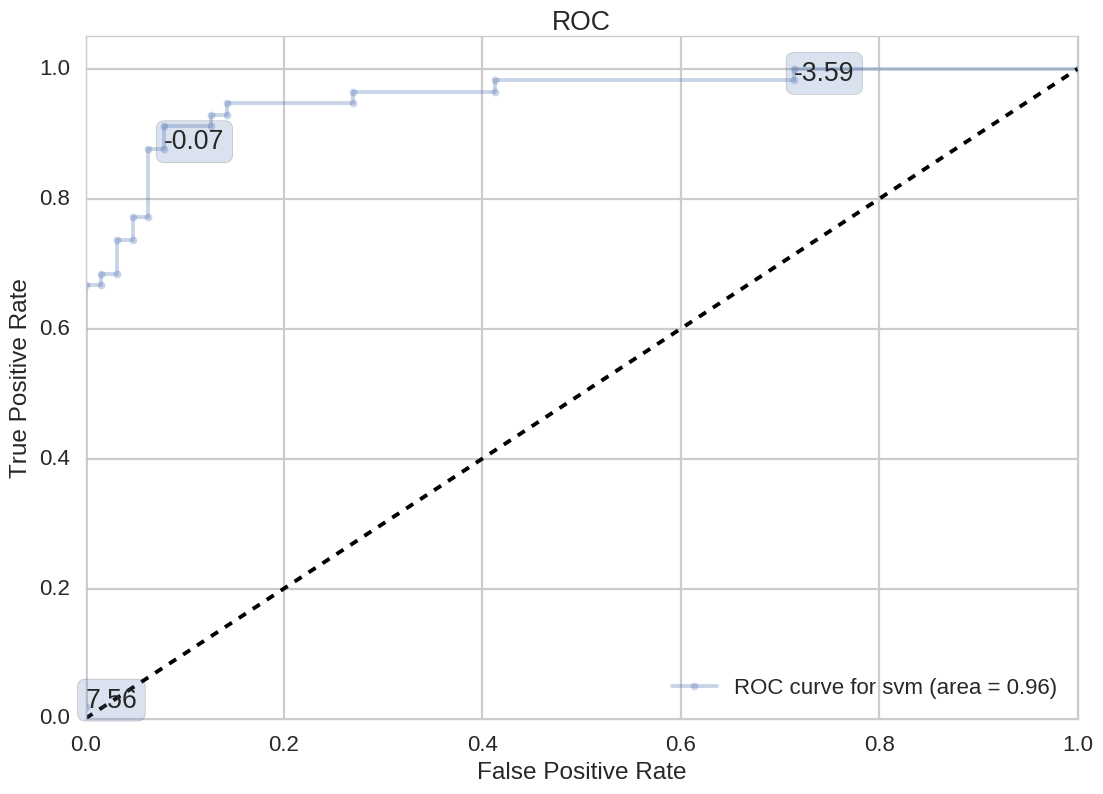

In [45]:
make_roc("svm", clfsvm, ytest, Xtest, label=10, proba=False)